In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\PROJECTS\\HEALTH CARE\\Project Health.csv")
df.tail(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df["gender"] = df["gender"].str.replace("Male","M")
df["gender"] = df["gender"].str.replace("Female","F")
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,M,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,F,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [5]:
df.duplicated().sum()
# There is no any duplicated value.

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.shape

(5110, 12)

In [8]:
df["bmi"].isnull().sum() # BMI column has null value

201

In [9]:
avg_bmi = df["bmi"].mean().round(1)
df["bmi"]=df["bmi"].fillna(avg_bmi)
df["bmi"].isnull().sum()#I have filled Null value with mean value of BMI.

0

In [10]:
df["ever_married"]=df["ever_married"].str.replace("Yes",'1')
df["ever_married"]=df["ever_married"].str.replace("No","0")
df["ever_married"].astype("int64").head(5)

0    1
1    1
2    1
3    1
4    1
Name: ever_married, dtype: int64

In [11]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [12]:
df["work_type"] = df["work_type"].str.replace("children","Children")
df["work_type"] = df["work_type"].str.replace("-"," ")
df["work_type"] = df["work_type"].str.replace("_"," ")
df["work_type"].unique()

array(['Private', 'Self employed', 'Govt job', 'Children', 'Never worked'],
      dtype=object)

In [13]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,M,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,F,61.0,0,0,1,Self employed,Rural,202.21,28.9,never smoked,1
2,31112,M,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1


In [14]:
a = df.groupby("work_type").agg({"work_type":"count"})
a

,work_type
work_type,
Children,687
Govt job,657
Never worked,22
Private,2925
Self employed,819


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


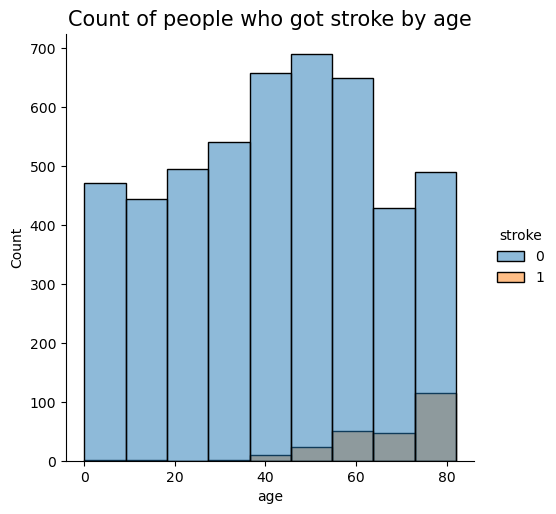

In [15]:

a = sns.displot(x= "age",data = df, bins = 9,hue = "stroke")
plt.title("Count of people who got stroke by age",size = 15)
plt.show()

 Observation :- 60-80 age group people is getting more stroke.

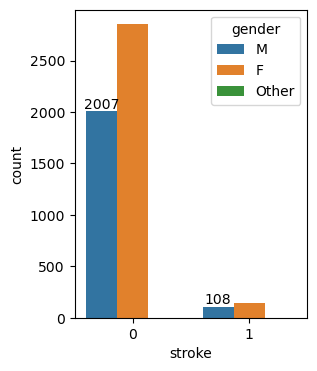

In [16]:
plt.figure(figsize = (3,4))
a = sns.countplot(x = df["stroke"], data = df,hue = "gender") 
a.bar_label(a.containers[0])
plt.show()

In [17]:
#Creating a new table where we have only stroke data points
df_stroke = df[df["stroke"]==1]
df_stroke.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,M,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,F,61.0,0,0,1,Self employed,Rural,202.21,28.9,never smoked,1


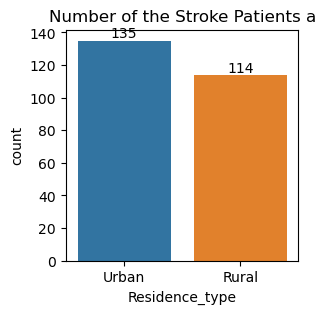

In [18]:
plt.figure(figsize = (3,3))
b = sns.countplot(x="Residence_type",data = df_stroke )
b.bar_label(b.containers[0])
plt.title("Number of the Stroke Patients a")
plt.show()

Observation :- Urban People are facing this problem more than Rural 

In [19]:
df_work= df_stroke.groupby(["work_type"])["id"].nunique().reset_index()
df_work

,work_type,id
0,Children,2
1,Govt job,33
2,Private,149
3,Self employed,65


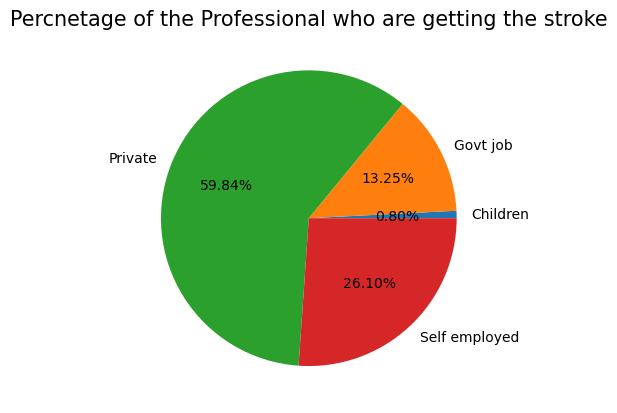

In [20]:
# plt.figure(figsize = (3,3))
plt.pie(df_work["id"],labels= df_work["work_type"],autopct= "%1.2f%%")
plt.title("Percnetage of the Professional who are getting the stroke",fontsize = "15")
plt.show()

Prviat job Proffesional has approx 60% chances of getting the stroke then self employed 

In [21]:
df_stroke.groupby(["smoking_status"])["id"].nunique().reset_index()

,smoking_status,id
0,Unknown,47
1,formerly smoked,70
2,never smoked,90
3,smokes,42


In [22]:
df_smoke = df_stroke[df_stroke["smoking_status"]!= "Unknown"]
df_smoke_ = df_smoke.groupby(["smoking_status"])["id"].count().reset_index()
df_smoke_

,smoking_status,id
0,formerly smoked,70
1,never smoked,90
2,smokes,42


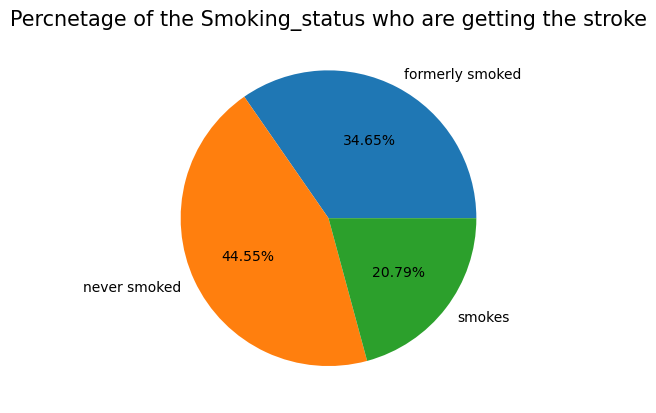

In [23]:
plt.pie(df_smoke_["id"],labels= df_smoke_["smoking_status"],autopct= "%1.2f%%")
plt.title("Percnetage of the Smoking_status who are getting the stroke",fontsize = "15")
plt.show()

Observation :- If a person never smoked then that person has a lager chanse to getting a stroke. 

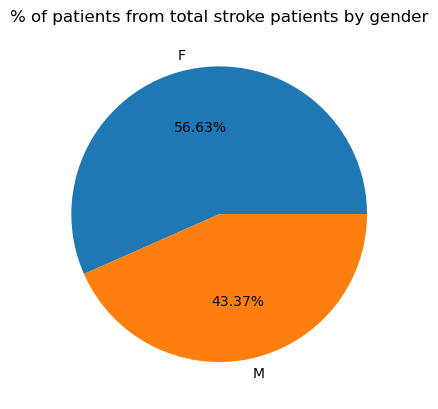

In [24]:
df_stroke_g = df_stroke.groupby(["gender"])["id"].nunique().reset_index()
plt.pie(df_stroke_g["id"],labels = df_stroke_g["gender"],autopct = "%1.2f%%")
plt.title("% of patients from total stroke patients by gender")
plt.show()

In [25]:
# I have filter the data of only male candidate.
df_male = df[df["gender"] == "M"]
df_male.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,M,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,M,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1


In [26]:
#How many male got the stroke 
df_male_st = df_male.groupby(["stroke"])["gender"].count().reset_index()
df_male_st.rename(columns = {"gender":"count"},inplace = True)
df_male_st["stroke"] = df_male_st["stroke"].replace({0:"No",1:"Yes"}) 
df_male_st

,stroke,count
0,No,2007
1,Yes,108


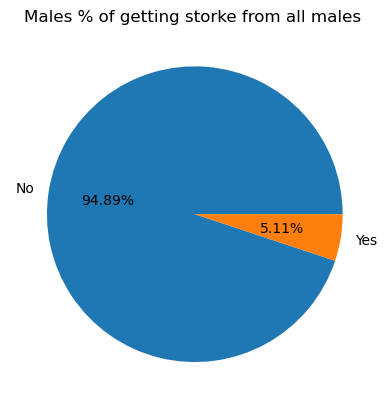

In [27]:
#Plot the pie graph
plt.pie(df_male_st["count"],labels = df_male_st["stroke"] ,autopct = "%1.2f%%" )
plt.title("Males % of getting storke from all males ")
plt.show()

In [28]:
# I have filter the data of only male candidate.
df_female = df[df["gender"] == "F"]
df_female.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,F,61.0,0,0,1,Self employed,Rural,202.21,28.9,never smoked,1
3,60182,F,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1


In [29]:
#How many male got the stroke 
df_female_st = df_female.groupby(["stroke"])["gender"].count().reset_index()
df_female_st.rename(columns = {"gender":"count"},inplace = True)
df_female_st["stroke"] = df_male_st["stroke"].replace({0:"No",1:"Yes"}) 
df_female_st

,stroke,count
0,No,2853
1,Yes,141


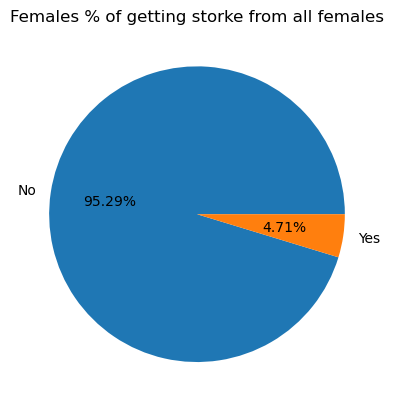

In [30]:
#Plot the pie graph
plt.pie(df_female_st["count"],labels = df_male_st["stroke"] ,autopct = "%1.2f%%" )
plt.title("Females % of getting storke from all females")
plt.show()

Observation :- Males 5.11% and Femle 4.71%. It means males has slitly high chances of getting stroke.

In [31]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,M,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,F,61.0,0,0,1,Self employed,Rural,202.21,28.9,never smoked,1


In [32]:

df_corr = df[["age","hypertension","heart_disease","ever_married","avg_glucose_level","bmi",
"smoking_status","stroke"]]
from sklearn.preprocessing import LabelEncoder

df_corr['smoking_status_encoded'] = LabelEncoder().fit_transform(df_corr['smoking_status'])
# Now 'smoking_status_encoded' will contain numeric values for correlation calculation.
df_corr = df_corr.select_dtypes(include=['float64', 'int64'])
df_corr.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_61868\3901405777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['smoking_status_encoded'] = LabelEncoder().fit_transform(df_corr['smoking_status'])


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325956,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160205,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168767,0.131945
bmi,0.325956,0.160205,0.038916,0.168767,1.000000,0.038971
stroke,0.245257,0.127904,0.134914,0.131945,0.038971,1.000000


<Axes: >

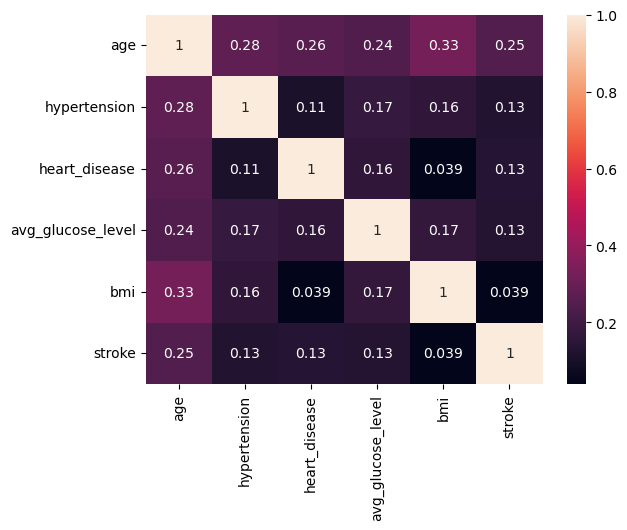

In [33]:
sns.heatmap(df_corr.corr(),annot = True)

In [34]:
a = df.shape[0]
a

5110

In [35]:
print("Number of STROKE Patients in % = " ,round((df["stroke"].sum()/a)*100,1))

Number of STROKE Patients in % =  4.9


In [36]:
print("Average Glucose Level = ",round(df["avg_glucose_level"].mean(),1))

Average Glucose Level =  106.1


In [37]:
print("Average Age = ",round(df["age"].mean(),1))

Average Age =  43.2


In [38]:
print("Number of HEART_DISEASE Patients in % = " ,round((df["heart_disease"].sum()/a)*100,1))

Number of HEART_DISEASE Patients in % =  5.4


In [39]:
print("Number of HYPERTENTION Patients in % = " ,round((df["hypertension"].sum()/a)*100,1))

Number of HYPERTENTION Patients in % =  9.7


In [40]:
print("Average BMI = ",round(df["bmi"].mean(),1))

Average BMI =  28.9


In [58]:
working_hyper= df.groupby(["work_type"]).agg({"hypertension":"sum","id":"count"}).reset_index()
working_hyper.rename(columns = {"id":"Count OF Patients","hypertension":"Count of Hyper. Patients"},inplace= True)
working_hyper.sort_values(by = ["Count of Hyper. Patients","Count OF Patients"],ascending = False,inplace = True)
working_hyper

,work_type,Count of Hyper. Patients,Count OF Patients
3,Private,281,2925
4,Self employed,144,819
1,Govt job,73,657
0,Children,0,687
2,Never worked,0,22


In [42]:
working_hyper.loc[1,"hypertension"]

73

In [43]:
#CREATING A NEW CSV FILE 
# df.to_csv("StrokeFile1.csv",index = False)

In [44]:
#IF YOU WANT TO CHANGE THE NUMBERIC VALUE TO WORDS LIKE YES OR NO 
# df["hypertension"] = df["hypertension"].replace({0:"No",1:"Yes"})
# df["heart_disease"] = df["heart_disease"].replace({0:"No",1:"Yes"})
# df["ever_married"] = df["ever_married"].replace({0:"No",1:"Yes"})
# df["stroke"] = df["stroke"].replace({0:"No",1:"Yes"})

In [45]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')